🛒 E-commerce Olist - Análise Exploratória (EDA)

1. Importação de bibliotecas

In [ ]:
import sys
from pathlib import Path

# Adiciona a raiz do projeto ao sys.path
ROOT_DIR = Path().resolve().parents[0]
sys.path.append(str(ROOT_DIR))

# Agora os imports funcionam
from src.data_loader import load_raw_data
from src.data_processing import (
    add_delivery_days,
    filter_valid_deliveries,
    merge_orders_customers,
    get_top_selling_products,
    merge_reviews_with_delivery
)

from src.data_loader import load_raw_data
from src.data_processing import (
    add_delivery_days,
    filter_valid_deliveries,
    merge_orders_customers,
    get_top_selling_products,
    merge_reviews_with_delivery
)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path

# Configurações visuais
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

2. Definição de caminhos

In [ ]:
# Caminho raiz do projeto (assume que este notebook está em /notebooks)
ROOT_DIR = Path().resolve().parents[0]
DATA_RAW_PATH = ROOT_DIR / 'data' / 'raw'
DATA_PROCESSED_PATH = ROOT_DIR / 'data' / 'processed'

3. Carregamento dos dados

In [ ]:
raw_data = load_raw_data(DATA_RAW_PATH)

orders = raw_data['orders']
customers = raw_data['customers']
items = raw_data['items']
payments = raw_data['payments']
products = raw_data['products']
reviews = raw_data['reviews']
sellers = raw_data['sellers']
category_translation = raw_data['category_translation']


4. Visão geral dos dados

In [ ]:
print("Pedidos:")
display(orders.head())

print("\nInformações dos pedidos:")
display(orders.info())

Pedidos:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26



Informações dos pedidos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


None

5. Análise dos Status dos Pedidos

C:\Users\Jou\AppData\Local\Temp\ipykernel_18752\2770511917.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette="Blues_d")


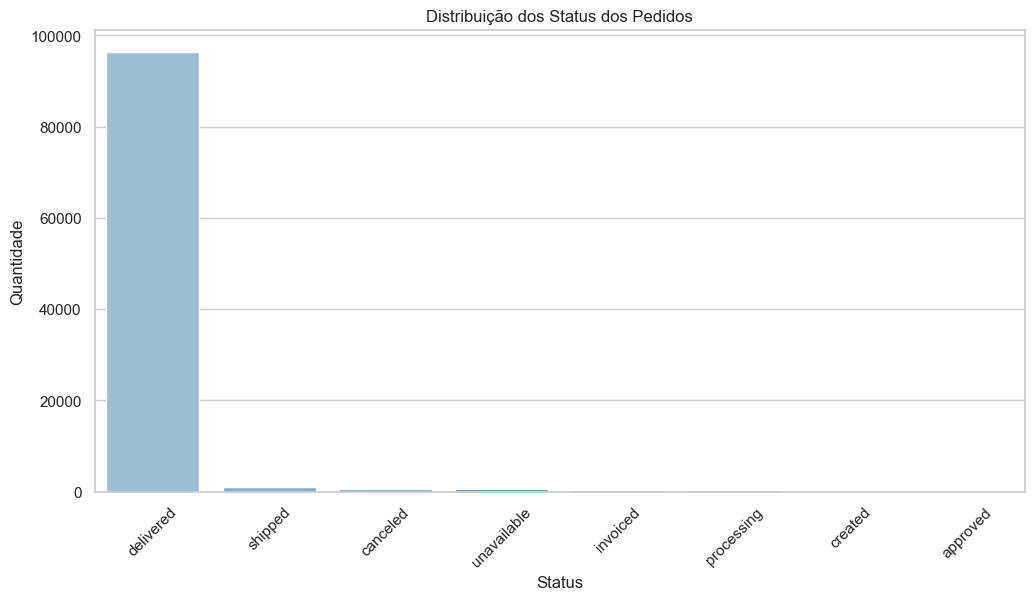

In [ ]:
status_counts = orders['order_status'].value_counts()
sns.barplot(x=status_counts.index, y=status_counts.values, palette="Blues_d")
plt.title('Distribuição dos Status dos Pedidos')
plt.ylabel('Quantidade')
plt.xlabel('Status')
plt.xticks(rotation=45)
plt.show()

6. Análise de Entregas

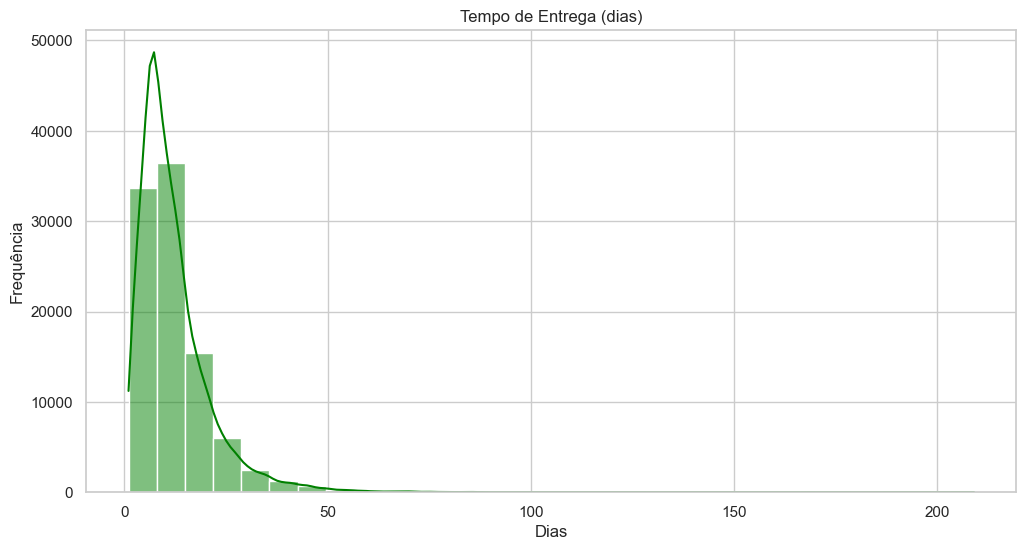

In [ ]:
orders['delivery_days'] = (
    orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']
).dt.days

delivery_valid = orders[orders['delivery_days'] > 0]

sns.histplot(delivery_valid['delivery_days'], bins=30, kde=True, color='green')
plt.title('Tempo de Entrega (dias)')
plt.xlabel('Dias')
plt.ylabel('Frequência')
plt.show()

7. Análise de Pagamentos

C:\Users\Jou\AppData\Local\Temp\ipykernel_18752\2818932984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_types.index, y=payment_types.values, palette="Purples")


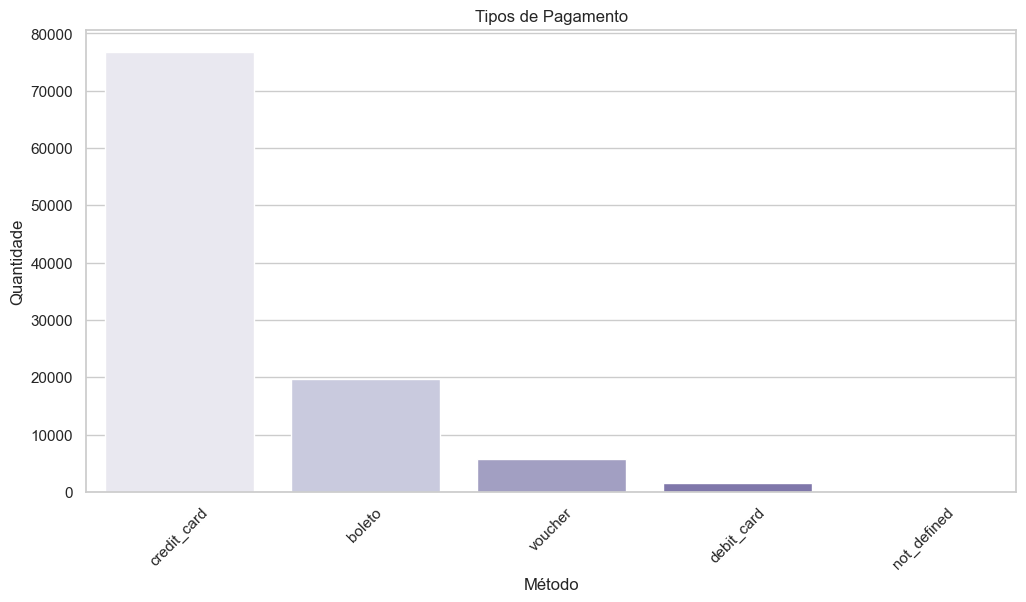

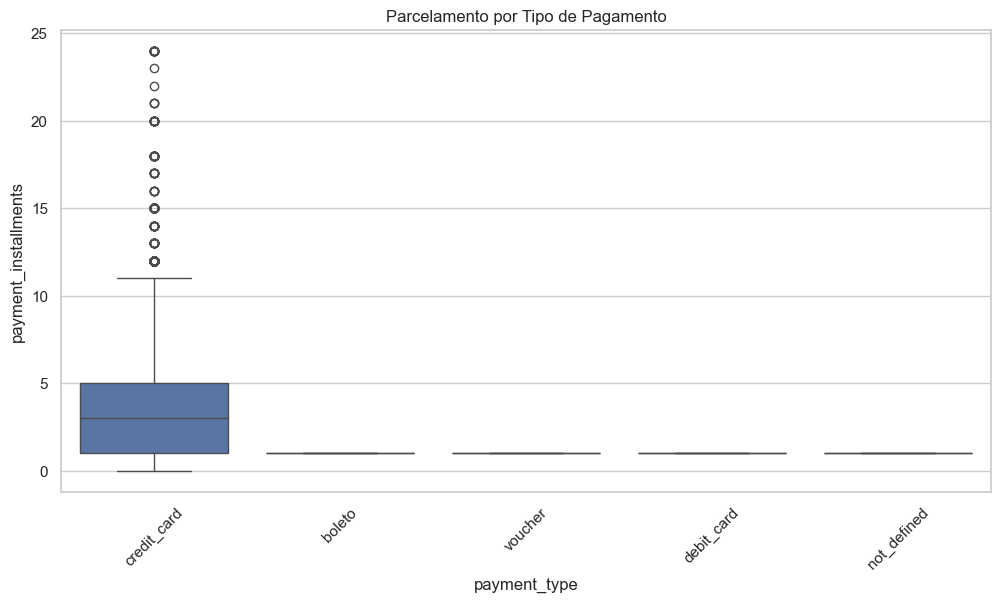

In [ ]:
payment_types = payments['payment_type'].value_counts()
sns.barplot(x=payment_types.index, y=payment_types.values, palette="Purples")
plt.title('Tipos de Pagamento')
plt.ylabel('Quantidade')
plt.xlabel('Método')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x='payment_type', y='payment_installments', data=payments)
plt.title('Parcelamento por Tipo de Pagamento')
plt.xticks(rotation=45)
plt.show()

8. Análise de Clientes por Estado

C:\Users\Jou\AppData\Local\Temp\ipykernel_18752\1441126958.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette="Set2")


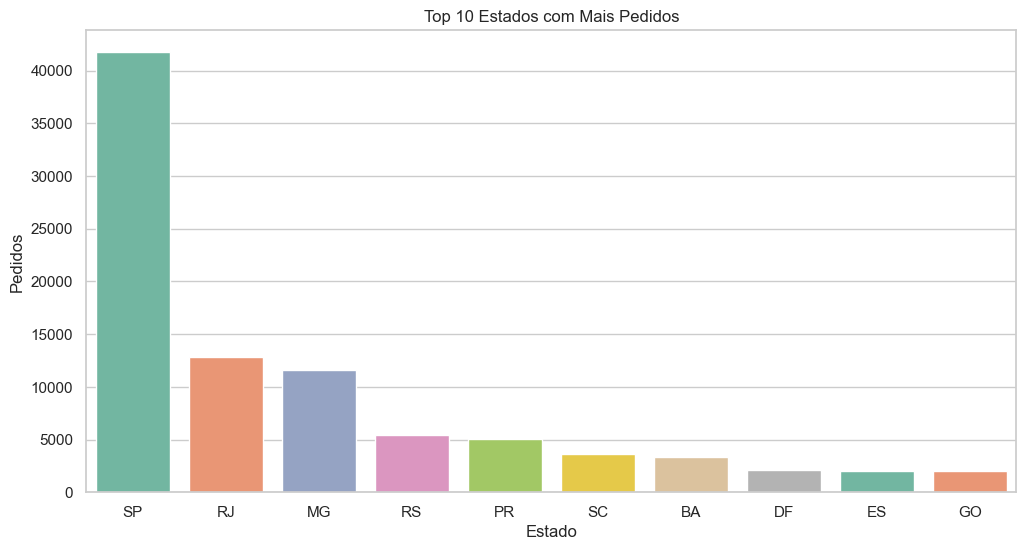

In [ ]:
orders_customers = pd.merge(orders, customers, on='customer_id')
state_counts = orders_customers['customer_state'].value_counts().head(10)

sns.barplot(x=state_counts.index, y=state_counts.values, palette="Set2")
plt.title('Top 10 Estados com Mais Pedidos')
plt.ylabel('Pedidos')
plt.xlabel('Estado')
plt.show()

9. Produtos Mais Vendidos

C:\Users\Jou\AppData\Local\Temp\ipykernel_18752\3822021911.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=produtos_top['product_category_name_english'], x=produtos_top['order_id'], palette='viridis')


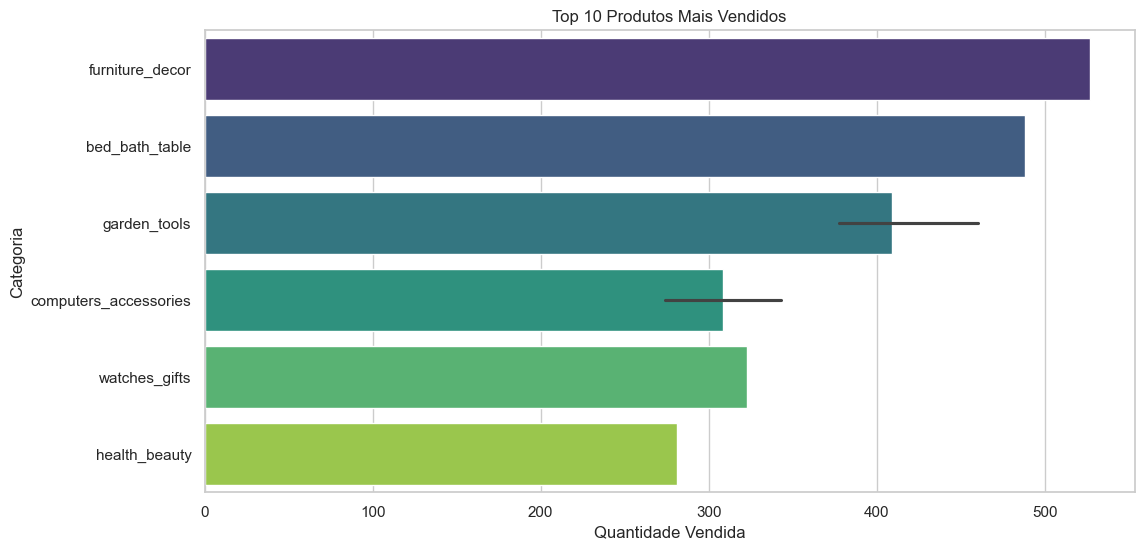

In [ ]:
produtos_vendidos = items.groupby('product_id')['order_id'].count().reset_index()
produtos_vendidos = produtos_vendidos.sort_values(by='order_id', ascending=False).head(10)

produtos_top = pd.merge(produtos_vendidos, products, on='product_id', how='left')
produtos_top = pd.merge(produtos_top, category_translation, on='product_category_name', how='left')

sns.barplot(y=produtos_top['product_category_name_english'], x=produtos_top['order_id'], palette='viridis')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Categoria')
plt.show()

10. Avaliações dos Clientes

C:\Users\Jou\AppData\Local\Temp\ipykernel_18752\2723308143.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_score', data=reviews, palette="coolwarm")


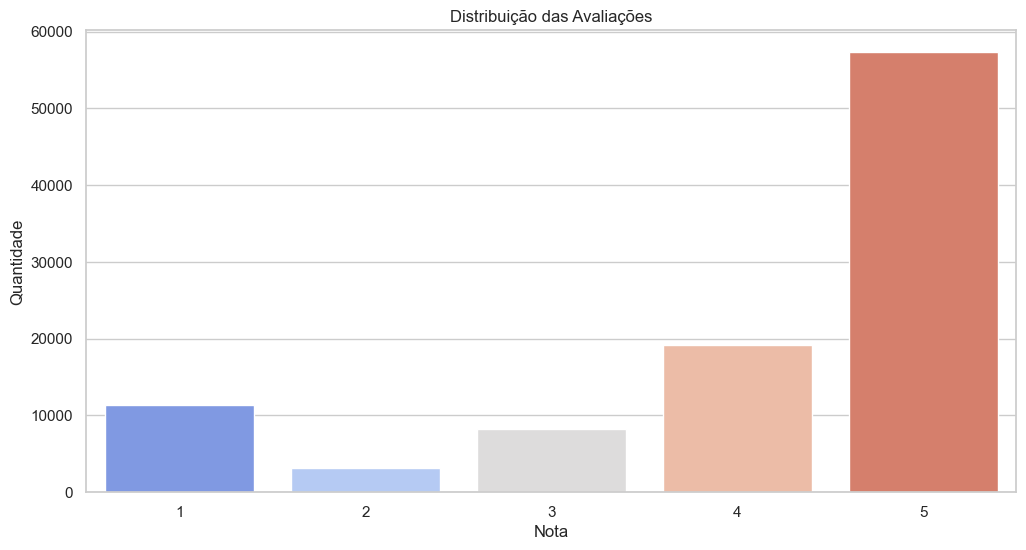

In [ ]:
sns.countplot(x='review_score', data=reviews, palette="coolwarm")
plt.title('Distribuição das Avaliações')
plt.xlabel('Nota')
plt.ylabel('Quantidade')
plt.show()

11. Correlação entre Tempo de Entrega e Nota

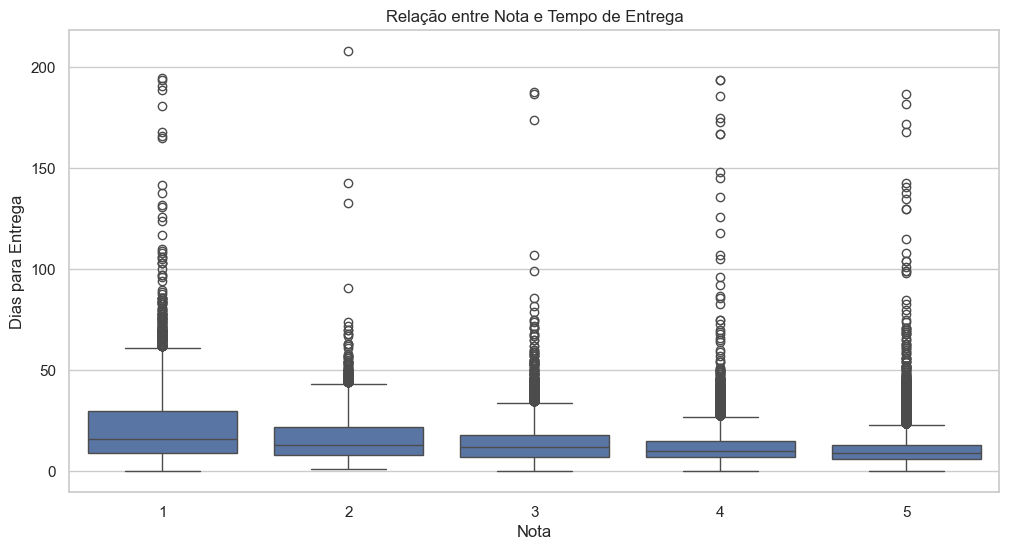

In [ ]:
merged = pd.merge(orders[['order_id', 'delivery_days']], reviews, on='order_id', how='inner')
sns.boxplot(x='review_score', y='delivery_days', data=merged)
plt.title('Relação entre Nota e Tempo de Entrega')
plt.xlabel('Nota')
plt.ylabel('Dias para Entrega')
plt.show()


12. Salvar Dados Processados

In [ ]:
orders = add_delivery_days(orders)
orders_cleaned = filter_valid_deliveries(orders)
orders_customers = merge_orders_customers(orders, customers)
produtos_top = get_top_selling_products(items, products, category_translation)
merged = merge_reviews_with_delivery(orders_cleaned, reviews)

orders_cleaned.to_csv(DATA_PROCESSED_PATH / 'orders_cleaned.csv', index=False)
orders_customers.to_csv(DATA_PROCESSED_PATH / 'orders_customers.csv', index=False)
produtos_top.to_csv(DATA_PROCESSED_PATH / 'products_top10.csv', index=False)
merged.to_csv(DATA_PROCESSED_PATH / 'reviews_delivery.csv', index=False)

13. Conclusões

In [ ]:
from IPython.display import Markdown as md

md("""
###  Conclusões

- A maioria dos pedidos foi entregue com sucesso.
- Cartão de crédito é o método de pagamento predominante.
- O tempo médio de entrega gira em torno de 10 dias, com outliers de atrasos maiores.
- Estados como SP, RJ e MG concentram a maior parte dos pedidos.
- As categorias de produtos mais vendidas incluem cama, mesa e banho, beleza e eletrônicos.
- Clientes costumam avaliar melhor entregas mais rápidas.
""")


###  Conclusões

- A maioria dos pedidos foi entregue com sucesso.
- Cartão de crédito é o método de pagamento predominante.
- O tempo médio de entrega gira em torno de 10 dias, com outliers de atrasos maiores.
- Estados como SP, RJ e MG concentram a maior parte dos pedidos.
- As categorias de produtos mais vendidas incluem cama, mesa e banho, beleza e eletrônicos.
- Clientes costumam avaliar melhor entregas mais rápidas.


In [ ]:
orders_cleaned[orders_cleaned['delivery_days'] > 100][['order_id', 'delivery_days', 'order_status']]